In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from astropy.table import Table
import os
import sys
sys.path.insert(0, '/home/aew492/lss-dipoles')
import tools

In [3]:
# load masked catalog with corrected mags and proper motions
cattab = Table.read(f'/scratch/aew492/quasars/catalogs/catwise2020/catwise_agns_corr_masked.fits', format='fits')

In [4]:
cattab

source_id,ra,dec,sigra,sigdec,sigradec,w1cov,w2cov,meanobsmjd,pmra,pmdec,sigpmra,sigpmdec,ebv,w1,w2,w1e,w2e,w12,w12e,tile,l,b,elon,elat,radius,radius2,pa
,deg,deg,arcsec,arcsec,arcsec,,,d,arcsec / yr,arcsec / yr,arcsec / yr,arcsec / yr,mag,mag,mag,mag,mag,mag,mag,,deg,deg,deg,deg,,,
bytes27,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,bytes8,float64,float64,float64,float64,int64,int64,int64
0000m016_b0-005603,359.41333750412764,-2.167267788407,0.0704,0.0699,-0.026,145.7,145.6,57172.630752,-0.01304579,0.0005776460000000011,0.03198,0.030444,0.040162895,16.136144306216387,14.989762870578096,0.02900000000094301,0.030000000000180063,1.1463814356382915,0.041725292090835,0000m016,93.36046431987428,-61.91100125480427,358.5994638365189,-1.755045763918577,0,0,0
0000m016_b0-010596,0.5450644041276,-1.177598988407,0.0934,0.0936,-0.0345,146.2,138.0,57206.949034,-0.08155579,-0.06885235399999999,0.044895,0.042362,0.04405317,16.410673971552402,15.369449314290657,0.03600000000075965,0.043000000000125625,1.0412246572617452,0.056080299571823776,0000m016,96.40152494864323,-61.485784856383,0.0315948577830099,-1.2972316580992056,0,0,0
0000m016_b0-005401,359.3693827041276,-1.7931065884069999,0.0737,0.0687,-0.025,145.3,144.1,57220.242888,0.052324209999999996,-0.029592353999999998,0.031734,0.029854,0.044649728,15.949601848069578,15.127401231968776,0.027000000001012863,0.03400000000015888,0.8222006161008029,0.04341658669293912,0000m016,93.62288294310186,-61.555357561551205,358.7080846825455,-1.3943010138585823,0,0,0
0000m016_b0-008110,0.0617950041276,-1.175226988407,0.0818,0.0811,-0.0253,149.2,145.3,57181.513037,-0.01082579,0.014407646,0.038376,0.03717,0.038658805,16.42132615067437,15.139884100371972,0.03400000000080434,0.03200000000016881,1.2814420503023989,0.046690470120416425,0000m016,95.48058894820512,-61.28840869196749,359.58916065153176,-1.102823551893205,0,0,0
0000m016_b0-007151,359.82987120412764,-1.977838988407,0.0773,0.0773,-0.0286,149.3,146.8,57218.25157,0.05061421000000001,-0.010832353999999999,0.036654,0.034928,0.040941555,16.2090501662679,15.208700110612437,0.03100000000088217,0.03600000000015005,1.0003500556554634,0.04750789408156815,0000m016,94.331730904729,-61.920453287741665,359.05694149169165,-1.7469151408832042,0,0,0
0000m016_b0-007695,359.7304187041276,-1.2496416884069999,0.0848,0.0855,-0.0315,148.4,147.6,57216.284868,0.04191421,-0.035692353999999996,0.041082,0.03953,0.043811794,16.400703154079615,15.19946876938641,0.037000000000739115,0.035000000000154345,1.2012343846932048,0.050931326313630385,0000m016,94.78964438756488,-61.21857504577585,359.255542876,-1.039288519489612,0,0,0
0000m016_b0-006651,359.65309700412763,-0.8613792884070001,0.0802,0.0748,-0.0296,150.7,148.3,57223.091816,-0.03488579,-0.010532354,0.036531,0.03245,0.04046587,16.161107676368207,15.321738450834527,0.02900000000094301,0.038000000000142156,0.8393692255336802,0.04780167361155359,0000m016,94.9801693285279,-60.8335987592685,359.339081045451,-0.6523166777257233,0,0,0
0000m016_b0-001610,359.3862815041276,-1.414645588407,0.0322,0.0296,-0.0109,156.7,154.8,57237.61135,0.023094209999999997,-0.004912354000000001,0.011069999999999998,0.010384000000000001,0.03438262,14.723843141339719,13.526228760970756,0.01600000000170921,0.013000000000415533,1.1976143803689627,0.020615528129676874,0000m016,93.9971234549282,-61.221587834110984,358.8741893650386,-1.0538014107795688,0,0,0


In [6]:
# make a working copy with proper W1 cut
cattab_ = cattab[cattab['w1']<=16.4]

In [7]:
len(cattab_)

2699096

$\Rightarrow$ Yes this matches the number of sources listed in the README !

In [8]:
cattab_ = cattab_[np.abs(cattab_['b']) > 30]

In [9]:
len(cattab_) # correct

1355409

"There is a small population of objects (57) with `w1cov < 80`. These have spuriously high  `w12` color. Remove these."

In [10]:
sum(cattab_['w1cov'] < 80)

57

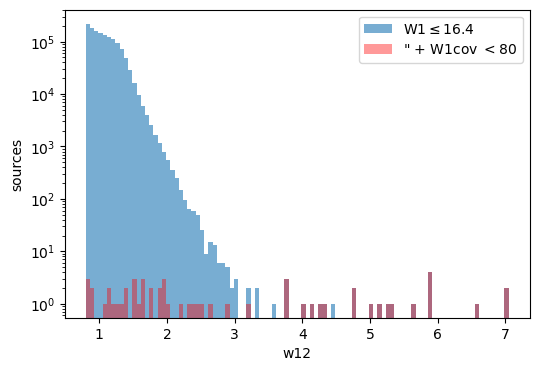

In [23]:
fig, ax = plt.subplots(figsize=(6,4))
_, bins, _ = ax.hist(cattab_['w12'], bins=100, alpha=0.6, label='W1$\leq 16.4$')
_, _, _ = ax.hist(cattab_['w12'][cattab_['w1cov'] < 80], bins=bins, color='r', alpha=0.4,
                  label='" + W1cov $<80$')
ax.set_yscale('log')
ax.set_xlabel('w12')
ax.set_ylabel('sources')
ax.legend()

In [24]:
cattab_ = cattab_[cattab_['w1cov'] >= 80]

In [25]:
len(cattab_)  # correct

1355352

In [51]:
# check out final catalog as healpix map
catmap = tools.load_catalog_as_map(cattab_, frame='galactic', dtype=np.float64)

In [52]:
catmap[catmap==0.] = hp.UNSEEN

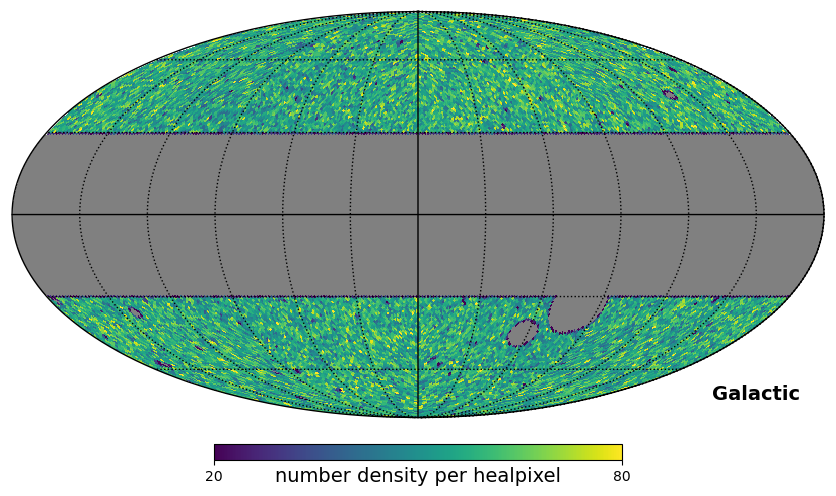

In [65]:
tools.mollview(catmap, coord='G', unit='number density per healpixel', min=20, max=80)

In [66]:
cattab_.write('/scratch/aew492/quasars/catalogs/catwise2020/catwise_agns_masked_final.fits', format='fits')